In [1]:
%matplotlib inline
import matplotlib
import pyVBF
import PyVAPlotCam as pycam
import numpy as np
import pylab as pl

# Plot trace

Read a vbf simulation file and plot a trace for a single PM in a single event

In [22]:
# Open the file, print how many events it contains
f = pyVBF.VBankFileReader("/Users/jsantand/CTA/simulation/CARE200010.vbf")
print "Events in file:", f.numPackets()

Events in file: 10011


140589537910720


(0, 50)

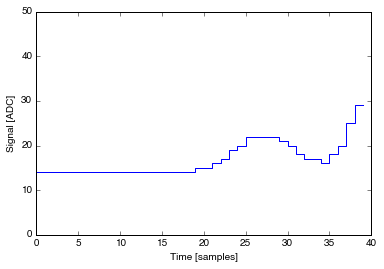

In [45]:
# An event with a nice shower
niceShower = 8819 # event ID
vp = f.readPacket(niceShower) # read the packet containing the event
ae = vp.getArrayEvent() # get the array event
event = ae.getEvent(0) # get the event for the first telescope (the only one in the SCT files)

gps = event.getGPSTime()
nicePM = 8133 # a PM with signal

t = event[nicePM]
i = [x for x in range(len(t))]
pl.step(i, t)
pl.xlabel("Time [samples]")
pl.ylabel("Signal [ADC]")
pl.ylim(0,50)

#### Basic functions to read camera geo and draw

In [28]:
def getCameraGeo(filename = "/Users/jsantand/CTA/simulation/camgeo.dat"):
    camgeo = np.genfromtxt(filename)
    xpix = camgeo[:,1]
    ypix = camgeo[:,2]
    idpix = camgeo[:,0]
    
    return (xpix, ypix)
    
def drawCamera(ax, charges, cmap=pl.get_cmap("plasma")):
    (xpix, ypix) = getCameraGeo()
    ax.scatter(xpix, ypix, s = 30, c=charges, lw=0, cmap=cmap) # marker='s'

#### Plot an the sum of all charges for an event

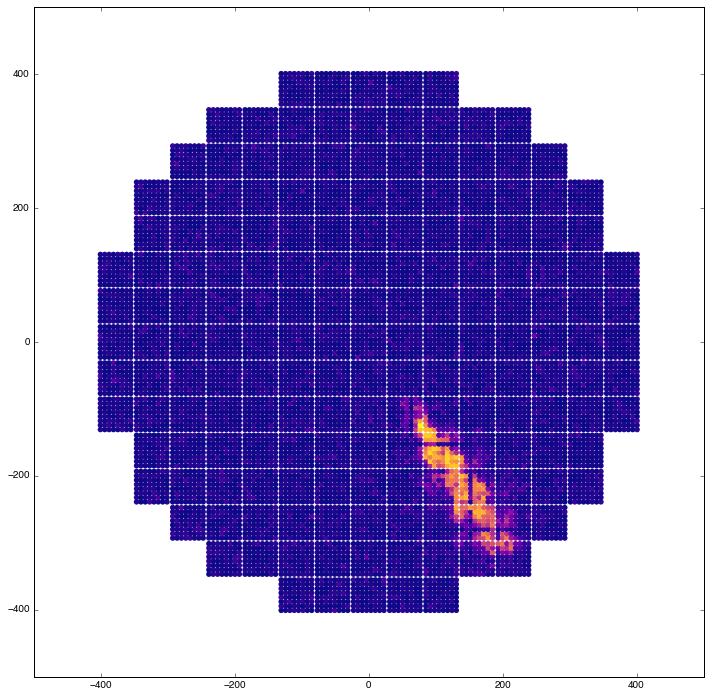

In [29]:
sums = [np.sum(event[i]) for i in range(len(event))]

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(111)    
drawCamera(ax,sums)